<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/A.Supervisado---Grupo9/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DiploDatos Kaggle Competition**

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

# **Librerías**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [21]:
train = pd.read_csv('https://raw.githubusercontent.com/CHRISTIANDAGATTI/A.Supervisado---Grupo9/main/train.csv')
print(df.shape)
print(df.describe())


(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7823.000000   7823.000000   7823.000000   7823.000000   
mean   4345.691039    28.840470    221.627764    446.615237    168.452512   
std    2504.576803    14.313512    673.194124   1606.401684    591.285786   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    20.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    37.000000     38.500000     56.500000     23.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7823.000000   7823.000000  7823.000000  
mean     298.862713    289.093570     0.506711  
std     1122.738262   1082.461294     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

In [22]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


# **Análisis exploratorio**
 Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

**Features:**

PassengerId: Un identificador para cada pasajero.

HomePlanet: El planeta del cual partió el pasajero. Típicamente su planeta de residencia permanente.

CryoSleep: Indica si el pasajero fue elegido a ser puesto en suspensión animada durante la duración del viaje. Los pasajeros en CryoSleep están confinados a sus cabinas.

Cabin: El número de cabina en donde el pasajero se está quedando. Toma la forma piso/número/lado, donde el lado puede ser P por babor o por estribor.

Destination: El destino en donde va a desembarcar el pasajero.

Age: La edad del pasajero.

VIP: Si el pasajero pagó por servicios VIP durante el viaje.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Cantidad que el pasajero ha gastado en cada una de las comodidades de lujo del Spaceship Titanic.

Name: El nombre y apellido de cada pasajero.

Transported: Si el pasajero fue transportado a otra dimensión o no. Esta es la columna target , la columna a predecir.

In [23]:
# Contamos la existencia de nulos en cada variable categórica
print(train.isna().sum())

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64


In [38]:
#Conteo de valores únicos por variable
train.nunique()

PassengerId     7823
HomePlanet         3
CryoSleep          2
Cabin           6009
Destination        3
Age               80
VIP                2
RoomService     1195
FoodCourt       1400
ShoppingMall    1045
Spa             1238
VRDeck          1229
Name            7623
Transported        2
dtype: int64

In [40]:
#Tipo de datos
train.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [43]:
# % de campos duplicados
print(f'Duplicados en archivo train: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')

Duplicados en archivo train: 0, (0.0%)


Text(0.5, 1.0, 'Target distribution')

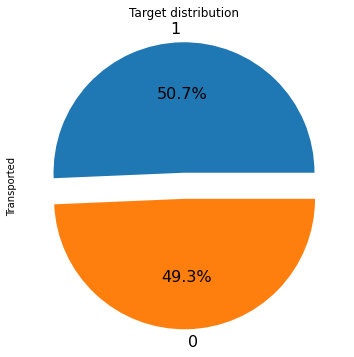

In [51]:
# Gráfico de etiquetas (Transportado: SI/NO)
plt.figure(figsize=(6,6))
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Target distribution")

Text(0.5, 0, 'Age (years)')

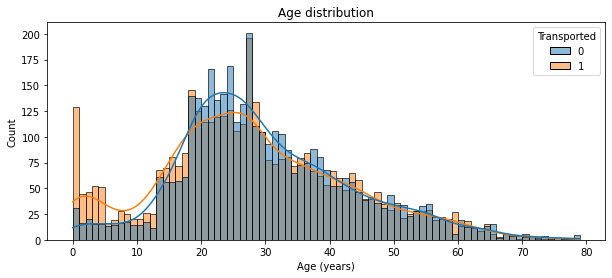

In [54]:
# Histograma de frecuencias "AGE"
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age distribution')
plt.xlabel('Age (years)')

De 0 a 18 años tenían más probabilidades de ser transportados que no.

De 18 a 25 años tenían menos probabilidades de ser transportados que no.

Desde 25 años tenían la misma probabilidad de ser transportados que los que no.

A partir de este gráfico podemos inferir que sería adecuado crear una nueva característica que indique si el pasajero es niño, adolescente o adulto.

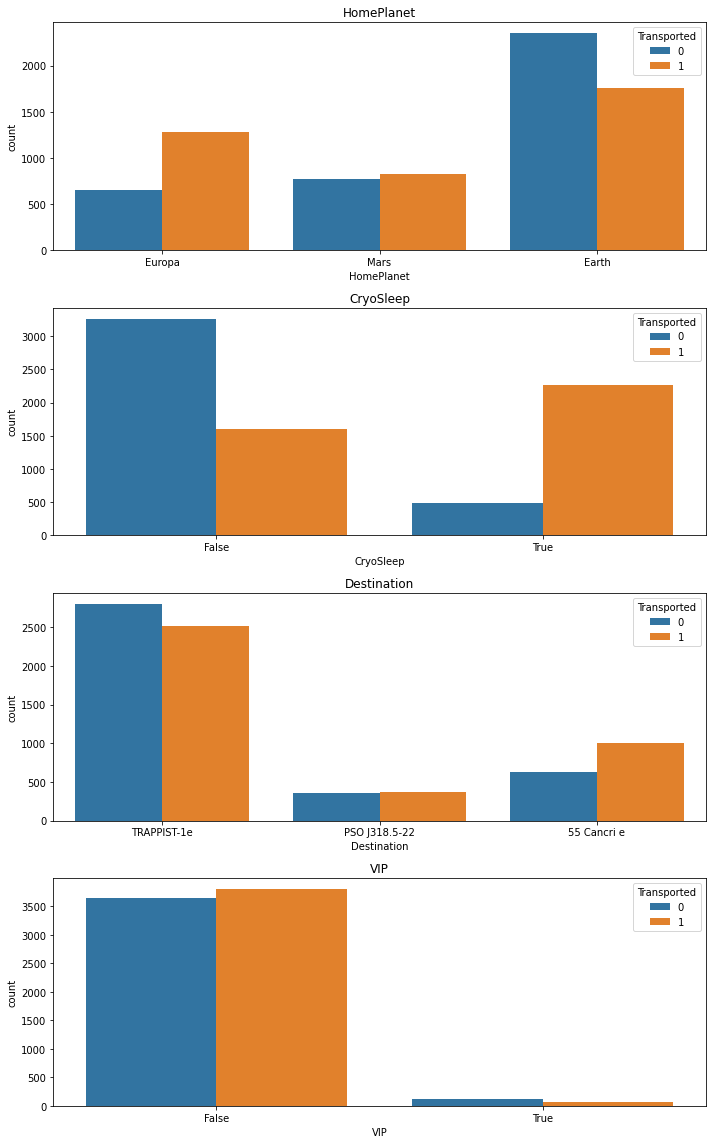

In [55]:
# Variables categóricas
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Gráfico
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

# **Curación**

In [24]:
#Columnas relevantes
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]

In [27]:
# Imputamos los valores Nan con el valor medio de cada feature
imputer = SimpleImputer(strategy="median")
train[imputer_cols] = imputer.fit_transform(train[imputer_cols])
y = train.Transported
X = train.drop('Transported',axis=1)
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


**Transformación**

Tendremos que transformar los datos para que sean numéricos (int64 o float64) para que podamos entrenar modelos de aprendizaje automático, ya que en general no funcionan con texto.

In [28]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


# **Planteo de modelos**

Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [44]:
#División entrenamiento - testeo
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [9]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test {name}: 72.72%


### **Ajuste de hiperparámetros de los modelos elegidos**

In [30]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decisión: 81.88%
Accuracy test Arbol de decisión: 76.29%


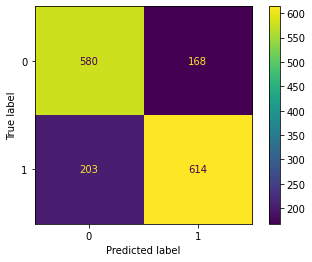

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       748
           1       0.79      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [31]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [32]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.67
Precisión test fold 1: 77.80
Precisión test fold 2: 78.04
Precisión test fold 3: 77.54
Precisión test fold 4: 76.58
Avg. accuracy = 77.72429979339212


# **Generar la salida para entregar**

In [33]:
test_df = pd.read_csv('https://raw.githubusercontent.com/CHRISTIANDAGATTI/A.Supervisado---Grupo9/main/test.csv')

In [34]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [35]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [36]:
test_id = PassengerId
test_pred = clf.predict(test_df)


In [37]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)